In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
userDframe = pd.read_csv('scores_sample.csv')  #Reading data from a input csv file

# Visualizing Data

Number of user:  1163
Number of deal viewed by user: 
max:  717 
mean:  43.0 
min:  1


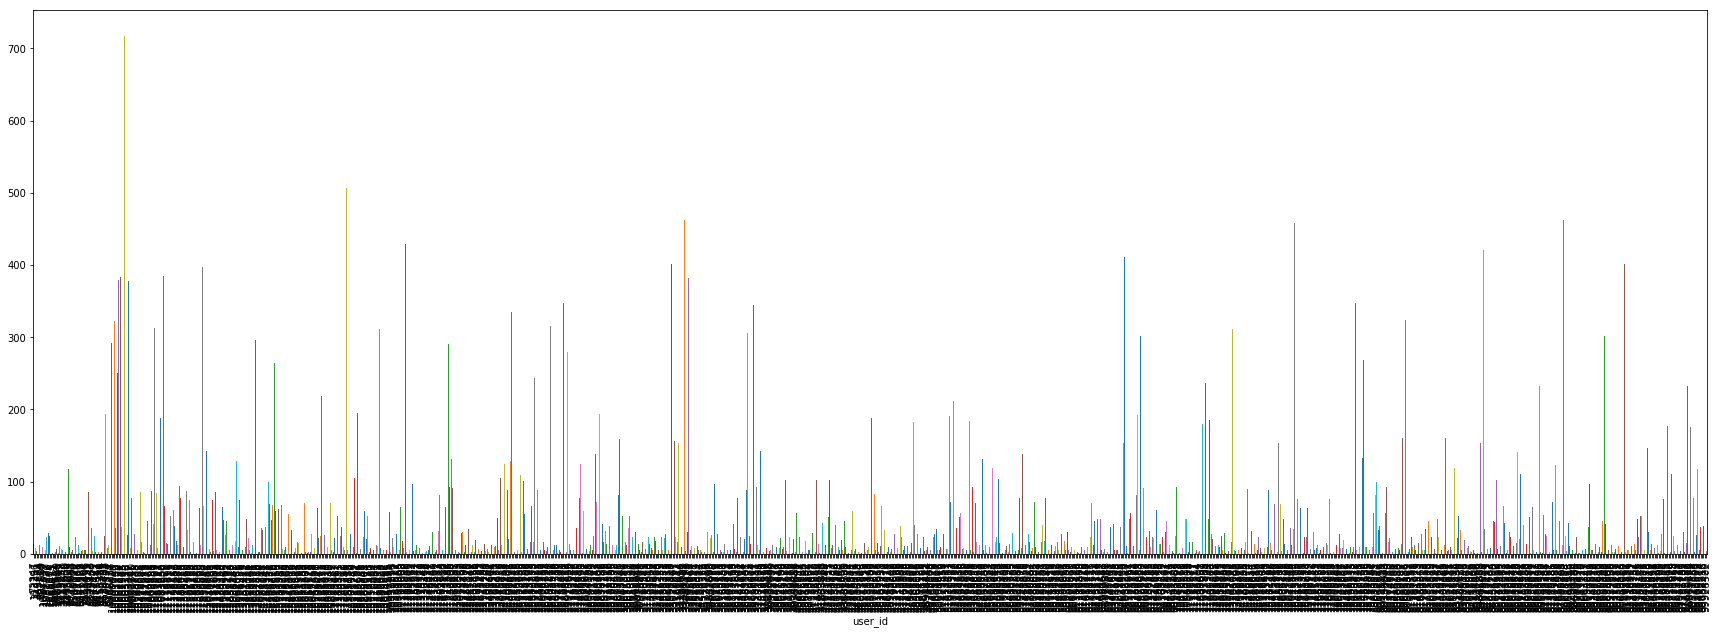

In [3]:
tempData = list(userDframe['user_id'])
userList = list(set(userDframe['user_id']))
dealList = list(set(userDframe['deal_id']))

# Visualaizing the number's of deal a particular user have viewed
print("Number of user: ", len(userList))
getUserOcc = userDframe.groupby('user_id').size()
print("Number of deal viewed by user:", "\nmax: ",getUserOcc.max(), "\nmean: ", np.ceil(getUserOcc.mean()), "\nmin: ", getUserOcc.min())

user_plot = getUserOcc.plot.bar(figsize = (30,10))

Number of deal:  773
Number of user viewed a particular view: 
max:  627 
mean:  65.0 
min:  1


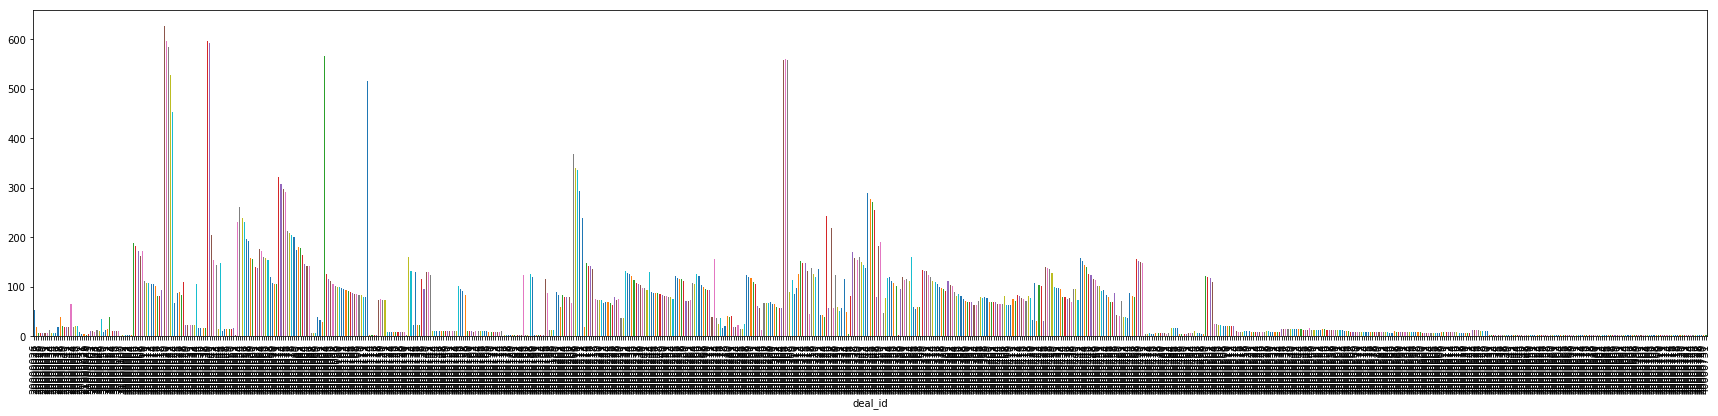

In [4]:
# Visualaizing the number of user who viewed a particular deal
print("Number of deal: ",len(dealList))
getDealOcc = userDframe.groupby('deal_id').size()
print("Number of user viewed a particular view:", "\nmax: ",getDealOcc.max(),"\nmean: ", np.ceil(getDealOcc.mean()), "\nmin: ", getDealOcc.min())
deal_plot = getDealOcc.plot.bar(figsize = (30,6))

# Matrix factorization

In [5]:
class MF():
    
    def __init__(self, data, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty entries in a matrix.
        
        Arguments:
        R: Input user-item rating matrix
        K: number of latent dimensions
        alpha: learning rate
        beta: regularization parameter
        """
        self.data = data
        self.num_users, self.num_items = data.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.data[np.where(self.data != 0)])
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.data[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.data[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; MSE = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.data.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.data[x, y] - predicted[x, y], 2)
        return np.sqrt(error)
    
    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)


In [6]:
def testMse(tListVal, tfullRecomList):
        """
        A function to compute the test mean square error
        """
        xs, ys = tListVal.nonzero()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(tListVal[x, y] - tfullRecomList[x, y], 2)
        return np.sqrt(error)

In [7]:
def plotIter():
    """
    Plot Iteration vs MSE graph from the given data 
    """
    x = [x for x, y in training_process]
    y = [y for x, y in training_process]
    plt.figure(figsize=((30,6)))
    plt.plot(x, y)
    plt.xticks(x, x)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Error")
    plt.grid(axis="y")

Training..
Iteration: 10 ; MSE = 26.5729
Iteration: 20 ; MSE = 25.5740
Iteration: 30 ; MSE = 25.0456
Iteration: 40 ; MSE = 24.6365
Iteration: 50 ; MSE = 24.2843
Iteration: 60 ; MSE = 24.3524
Iteration: 70 ; MSE = 24.2305
Iteration: 80 ; MSE = 24.0243
Iteration: 90 ; MSE = 23.9154
Iteration: 100 ; MSE = 23.9884
Iteration: 110 ; MSE = 24.2377
Iteration: 120 ; MSE = 23.7472
Iteration: 130 ; MSE = 23.7068
Iteration: 140 ; MSE = 23.9040
Iteration: 150 ; MSE = 23.9029
Iteration: 160 ; MSE = 23.7421
Iteration: 170 ; MSE = 23.7693
Iteration: 180 ; MSE = 23.8424
Iteration: 190 ; MSE = 23.7442
Iteration: 200 ; MSE = 23.7705

Test MSE:  15.576963639365637


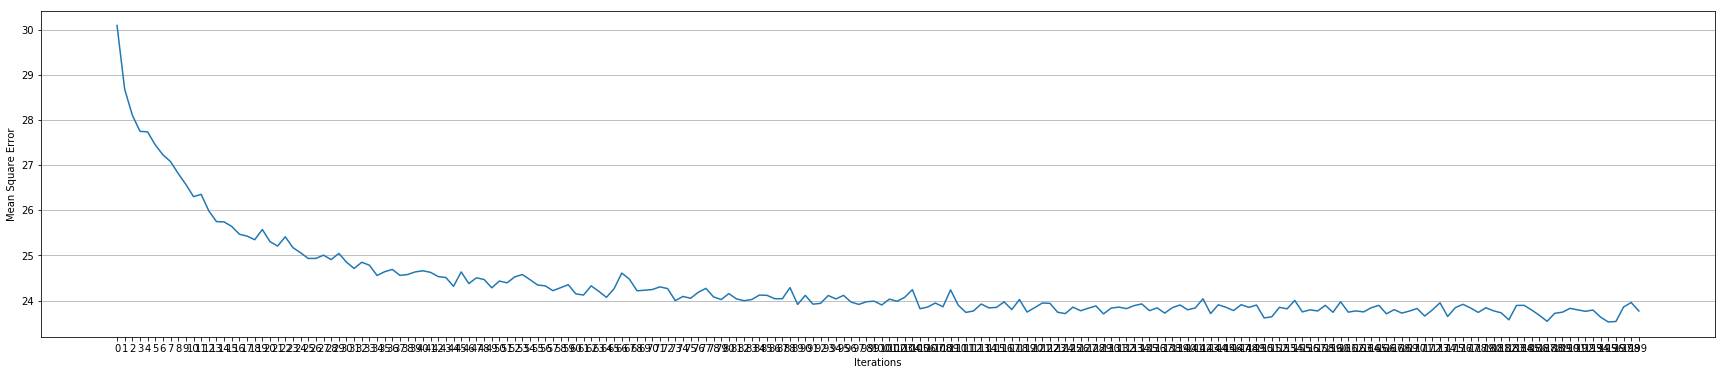

In [8]:
mls = userDframe.pivot_table('swipe_score', ['user_id'], 'deal_id')
tempDf = mls.replace(np.nan, 0)
listVal = tempDf.values/100
mf = MF(listVal, K=2, alpha=0.1, beta=0.01, iterations=200)

#Taking 30% data for testing from the dataset

lSize = len(listVal)
tSize = (np.ceil(lSize * .3)).astype(int)
print("Training..")
training_process = mf.train()
tListVal = listVal[:tSize-1]
fullRecomList = mf.full_matrix()
tfullRecomList = fullRecomList[:tSize-1]
# print the MSE for the test set
print("\nTest MSE: ",testMse(tListVal, tfullRecomList))
plotIter()


I have trained this more than 200 iteration, but it doesn't produce any better result. From the graph we can see, after almost 100 iteration the MSE value remains almost same.  

# Reconstructing Dataframe 

In [9]:
"""
Reconstruct the dataset for visual purpose
"""
colName = list(mls.columns.values)
df = pd.DataFrame(fullRecomList*100, columns = colName, dtype = float) 
dealIdList  = mls.index
reCondata=df.set_index(dealIdList)
reCondata.head()

,20000026,20000027,20000028,20000029,20000030,20000031,20000032,20000033,20000034,20000035,...,40000722,40000723,40000724,40000725,40000726,40000727,40000728,40000729,40000730,40000731
user_id,,,,,,,,,,,,,,,,,,,,,
72247,100.301195,87.510637,57.143673,111.655663,82.985201,84.520468,94.688340,93.389221,73.362454,81.212385,...,92.173145,95.209216,83.764155,95.233621,94.605179,95.650421,99.954501,84.071184,108.745877,102.637483
153796,35.121925,84.940907,160.450414,69.694291,130.922525,131.878170,125.403117,68.188799,140.444558,81.516125,...,53.059300,50.400607,132.258755,53.901724,82.121977,49.471773,29.428562,126.027844,28.074689,75.752196
313321,65.328565,91.633990,103.805511,83.449348,100.230772,101.956464,102.930587,83.862291,98.271589,87.174821,...,43.380873,74.836155,113.472272,79.424527,93.993833,69.562289,68.793436,112.218717,73.095920,101.836594
349701,103.210504,101.538069,87.620831,117.916699,104.144520,105.631958,112.963982,103.445929,97.493418,95.754550,...,96.708966,101.923385,106.230894,102.803885,107.017397,101.636545,102.627610,105.628498,109.801571,113.370391
463654,76.438392,75.607515,126.606939,112.280521,128.492818,128.484813,132.364532,75.915052,133.656351,69.742046,...,151.342853,70.363717,97.959276,64.846121,77.033093,83.146421,56.526312,90.476718,58.591591,59.481999


# Finalaizing Matrix Factorization Output Table

In [10]:
"""
Eleminating all the deals which is already viewed by the user
Here, using element wise multiplication 
"""
tempM=mls
temDf = tempM.replace(np.nan, -1)   #Replacing all Nan with -1
temDf[temDf>=0] = 0                 #Replacing all values grater than 0 with 0
temDf = temDf.replace(-1, 1)        #Replacing -1 Nan with 1
mulResult = pd.DataFrame(reCondata.values*temDf.values, columns=df.columns, index=reCondata.index)
mulResult.to_csv('recomListMF.csv', encoding='utf-8', index=True)
mulResult.head()

,20000026,20000027,20000028,20000029,20000030,20000031,20000032,20000033,20000034,20000035,...,40000722,40000723,40000724,40000725,40000726,40000727,40000728,40000729,40000730,40000731
user_id,,,,,,,,,,,,,,,,,,,,,
72247,100.301195,87.510637,57.143673,111.655663,82.985201,84.520468,94.688340,93.389221,73.362454,81.212385,...,92.173145,95.209216,83.764155,95.233621,94.605179,95.650421,99.954501,84.071184,108.745877,102.637483
153796,35.121925,84.940907,160.450414,69.694291,130.922525,131.878170,125.403117,68.188799,140.444558,81.516125,...,53.059300,50.400607,132.258755,53.901724,82.121977,49.471773,29.428562,126.027844,28.074689,75.752196
313321,65.328565,91.633990,103.805511,83.449348,100.230772,101.956464,102.930587,83.862291,98.271589,87.174821,...,43.380873,74.836155,113.472272,79.424527,93.993833,69.562289,68.793436,112.218717,73.095920,101.836594
349701,103.210504,101.538069,87.620831,117.916699,104.144520,105.631958,112.963982,103.445929,97.493418,95.754550,...,96.708966,101.923385,106.230894,102.803885,107.017397,101.636545,102.627610,105.628498,109.801571,113.370391
463654,76.438392,75.607515,126.606939,112.280521,128.492818,128.484813,132.364532,75.915052,133.656351,69.742046,...,151.342853,70.363717,97.959276,64.846121,77.033093,83.146421,56.526312,90.476718,58.591591,59.481999


In [11]:
"""
Doing co-relation between user-user
"""
data = pd.pivot_table(userDframe, index='deal_id', columns='user_id', values='swipe_score')
uu_sim = data.corr()
tempRecomMFTposed = mulResult.T

# Generating A or B for both method

In [12]:
"""
This is returning a user's neighbours
"""
def get_top_users(uu_sim,target,n=6):
    target_cor = uu_sim.loc[target]
    top_neighbors = target_cor.nlargest(n+1).iloc[1:]
    return top_neighbors

In [13]:
"""
function for generating user's recommendation list
"""
def get_user_deal_score(deal,user):
    neighbors = get_top_users(uu_sim,user)
    rating_sum = 0
    weight_sum = 0
    for user,w in zip(neighbors.index,neighbors.values):
        if np.isnan(deal[user]):
            continue
        rating_sum += deal[user] * w
        weight_sum += w
    if weight_sum == 0:
        return 0
    else:
        return rating_sum/weight_sum

In [14]:
"""
Function to save data in a file.
"""
predictedTable = pd.DataFrame(columns=['user_id', 'deal_id', 'deals_recom_score'])

for user in userList:
    table = pd.DataFrame()    
    predict = data.apply(get_user_deal_score,axis=1,args=(user,))
    predictValue = predict.tolist()
    table = pd.DataFrame({'user_id': user,
                        'deal_id': dealList,
                        'deals_recom_score': predictValue})
    predictedTable = predictedTable.append(table)
    
predictedTable.to_csv('recomListUser.csv', encoding='utf-8', index=True)

In [15]:
viewData = predictedTable.pivot_table('deals_recom_score', ['user_id'], 'deal_id', aggfunc='first')
tempRecomUserTposed = viewData.T

In [16]:
def scaleRecomList(scaleInput):
    hByInputMax = 100/(np.array(scaleInput).max())
    return np.dot(np.array(scaleInput), hByInputMax)

In [17]:
"""
Used to create A or B test dataset
"""
def aBybSetTest(tableName, tempuser, listOfNbour):
    dealIndexList = list(tableName.index)
    col_names = ['deal_id','deals_recom_score']
    tempaBybtestDframe = pd.DataFrame(columns = col_names)
    for nBour in listOfNbour:
        listOfUserItem = list(tableName[nBour])
        nBourUserData = pd.DataFrame({"user_id": tempuser,
                                     "deal_id": dealIndexList,
                                     "deals_recom_score": listOfUserItem})
        
        slicedNBourUserData = (nBourUserData.sort_values(by=['deals_recom_score'],ascending=False))[:300]
        tempaBybtestDframe = tempaBybtestDframe.append(slicedNBourUserData,ignore_index=True)
        tempaBybtestDframe = ((tempaBybtestDframe.drop_duplicates(subset=['deal_id'], keep='first')).sort_values(by=['deals_recom_score'],ascending=False))
    return tempaBybtestDframe      

In [18]:
"""
This is the caller cell for matrix factorization's A/B testing
First, calling the get_top_users to get the neighbour
Secondly, calling the aBybSetTest to get a A or B set
        ->then retuning A or B set depending on the flag value
"""

def mfAbyBGenerator(user, flag):
    global uC
    col_names = ['user_id','deal_id','deals_recom_score']
    aSet = pd.DataFrame(columns = col_names)
    bSet = pd.DataFrame(columns = col_names) 
    tableName = tempRecomMFTposed
    
    nNeighbour = get_top_users(uu_sim,user)
    if nNeighbour.empty:
        pass
    else:
        nNeighbourList = (list(nNeighbour.index))
        if flag == 'a':
            tempASet = aBybSetTest(tableName, user, nNeighbourList[:3])
            scaledValue = scaleRecomList(list(tempASet['deals_recom_score']))
            tempASet['deals_recom_score'] = scaledValue
            return tempASet
        elif flag == 'b':
            tempBSet = aBybSetTest(tableName, user, nNeighbourList[3:])
            scaledValue = scaleRecomList(list(tempBSet['deals_recom_score']))
            tempBSet['deals_recom_score'] = scaledValue
            return tempBSet

In [19]:
"""
This is the caller cell for use-user method's A/B testing
First, calling the get_top_users to get the neighbour
Secondly, calling the aBybSetTest to get a A or B set
        ->then retuning A or B set depending on the flag value
"""
def userAbyBGenerator(user, flag):
    global uC
    col_names = ['user_id','deal_id','deals_recom_score']
    aSet = pd.DataFrame(columns = col_names)
    bSet = pd.DataFrame(columns = col_names) 
    tableName = tempRecomUserTposed
    
    nNeighbour = get_top_users(uu_sim,user)
    if nNeighbour.empty:
        pass
    else:
        nNeighbourList = (list(nNeighbour.index))
        if flag == 'a':
            return aBybSetTest(tableName, user, nNeighbourList[:3])
        elif flag == 'b':
            return aBybSetTest(tableName, user, nNeighbourList[3:])

In [21]:
"""
This cell is for A or B set generator
"""
col_names = ['user_id','deal_id','deals_recom_score']
finalASet = pd.DataFrame(columns = col_names)
finalBSet = pd.DataFrame(columns = col_names)
for eachuser in userList:
    tempA = pd.DataFrame(columns = col_names)
    tempB = pd.DataFrame(columns = col_names)
    
    receivedASetMf = mfAbyBGenerator(eachuser, flag='a')
    tempA = tempA.append(receivedASetMf, ignore_index = True)
    receivedASetUser = userAbyBGenerator(eachuser, flag='a')
    tempA = tempA.append(receivedASetUser, ignore_index = True)
    tempA= ((tempA.drop_duplicates(subset=['deal_id'], keep='first')).sort_values(by=['deals_recom_score'],ascending=False))
    finalASet = finalASet.append(tempA, ignore_index = True)
    
    receivedBSetMf = mfAbyBGenerator(eachuser, flag='b')
    tempB = tempB.append(receivedBSetMf, ignore_index = True)
    receivedBSetUser = userAbyBGenerator(eachuser, flag='b')
    tempB = tempB.append(receivedBSetUser, ignore_index = True)
    tempB = ((tempB.drop_duplicates(subset=['deal_id'], keep='first')).sort_values(by=['deals_recom_score'],ascending=False))
    finalBSet = finalBSet.append(tempB, ignore_index = True)
    
finalASet.to_csv('final_A_Set.csv', encoding='utf-8', index=True)
finalBSet.to_csv('final_B_Set.csv', encoding='utf-8', index=True)